# This is the second part of the the project. 


In [ ]:
# Import all required packages
import pandas as pd
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
import re
import csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from nltk.stem.porter import *
from textblob import TextBlob
import tweepy
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
from nltk.probability import FreqDist
import gensim
from gensim.utils import simple_preprocess
# Load English language model
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim.corpora as corpora

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load My dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datapath = '/content/drive/MyDrive/Python/PAI 789/xenophobic tweets.csv'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
xenotweet = pd.read_csv(datapath)
xenotweet.info()
xenotweet.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52428 entries, 0 to 52427
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  52428 non-null  int64 
 1   text        52428 non-null  object
dtypes: int64(1), object(1)
memory usage: 819.3+ KB


,Unnamed: 0,text
0,2,update three suspected cases travellers from f...
1,4,fake wuhan citizens voice discontent chinese g...
2,29,ãââwe know coronavirus doesnãâât respect borde...
3,81,meanwhile another channel this ãâââ hope fake ...
4,111,just case youre thinking dave steady give coro...


### Preprocess

In [ ]:
# Tokenize the words
# Statistic the vocabulary

all_words = [word for tokens in xenotweet['text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in xenotweet['text']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7350328 words total, with a vocabulary size of 49
Max tweet length is 660


In [ ]:
# Remove punctuation 
xenotweet['processed_data']=xenotweet['text'].map(lambda x: re.sub('[;,\.!?&]','',x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence '\.'
<>:2: DeprecationWarning: invalid escape sequence '\.'
<ipython-input-83-21d761b19226>:2: DeprecationWarning: invalid escape sequence '\.'
  xenotweet['processed_data']=xenotweet['text'].map(lambda x: re.sub('[;,\.!?&]','',x))


In [ ]:
# Tokenization and stop-words removing

def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence),deacc=True)) #deacc=True removes punctuations

data = xenotweet.processed_data.values.tolist()
data_words = list(sent_to_words(data))

def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc))
  if word not in stop_words] for doc in texts]

stop_words=stopwords.words('english')
stop_words.extend(['said','asked','will','would','also','may','could','might','must','may','ãââ','aaa','a'])

# remove stop words
data_words=remove_stopwords(data_words)

print(data_words[:1][0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['update', 'three', 'suspected', 'cases', 'travellers', 'france', 'england', 'china', 'whose', 'samples', 'collected', 'yesterday', 'analysis', 'tested', 'negative', 'dischsrged']


In [ ]:
# Use Regular Expression to remove more random words, like 'aaa'. 
tweets_without_aaa = [re.sub('aaa', '', str(tweet)) for tweet in data_words]

print(tweets_without_aaa[:1][0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['update', 'three', 'suspected', 'cases', 'travellers', 'france', 'england', 'china', 'whose', 'samples', 'collected', 'yesterday', 'analysis', 'tested', 'negative', 'dischsrged']


In [ ]:
cleaned_data_words = [tweet.replace("'", "") for tweet in tweets_without_aaa]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
xenotweet['data_words'] = data_words
xenotweet['postprocess'] = cleaned_data_words

xenotweet.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,text,processed_data,data_words,postprocess
0,2,update three suspected cases travellers from f...,update three suspected cases travellers from f...,"[update, three, suspected, cases, travellers, ...","[update, three, suspected, cases, travellers, ..."
1,4,fake wuhan citizens voice discontent chinese g...,fake wuhan citizens voice discontent chinese g...,"[fake, wuhan, citizens, voice, discontent, chi...","[fake, wuhan, citizens, voice, discontent, chi..."
2,29,ãââwe know coronavirus doesnãâât respect borde...,ãââwe know coronavirus doesnãâât respect borde...,"[aaawe, know, coronavirus, doesnaaat, respect,...","[we, know, coronavirus, doesnt, respect, borde..."
3,81,meanwhile another channel this ãâââ hope fake ...,meanwhile another channel this ãâââ hope fake ...,"[meanwhile, another, channel, aaaa, hope, fake...","[meanwhile, another, channel, a, hope, fake, c..."
4,111,just case youre thinking dave steady give coro...,just case youre thinking dave steady give coro...,"[case, youre, thinking, dave, steady, give, co...","[case, youre, thinking, dave, steady, give, co..."


### Visualize my data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


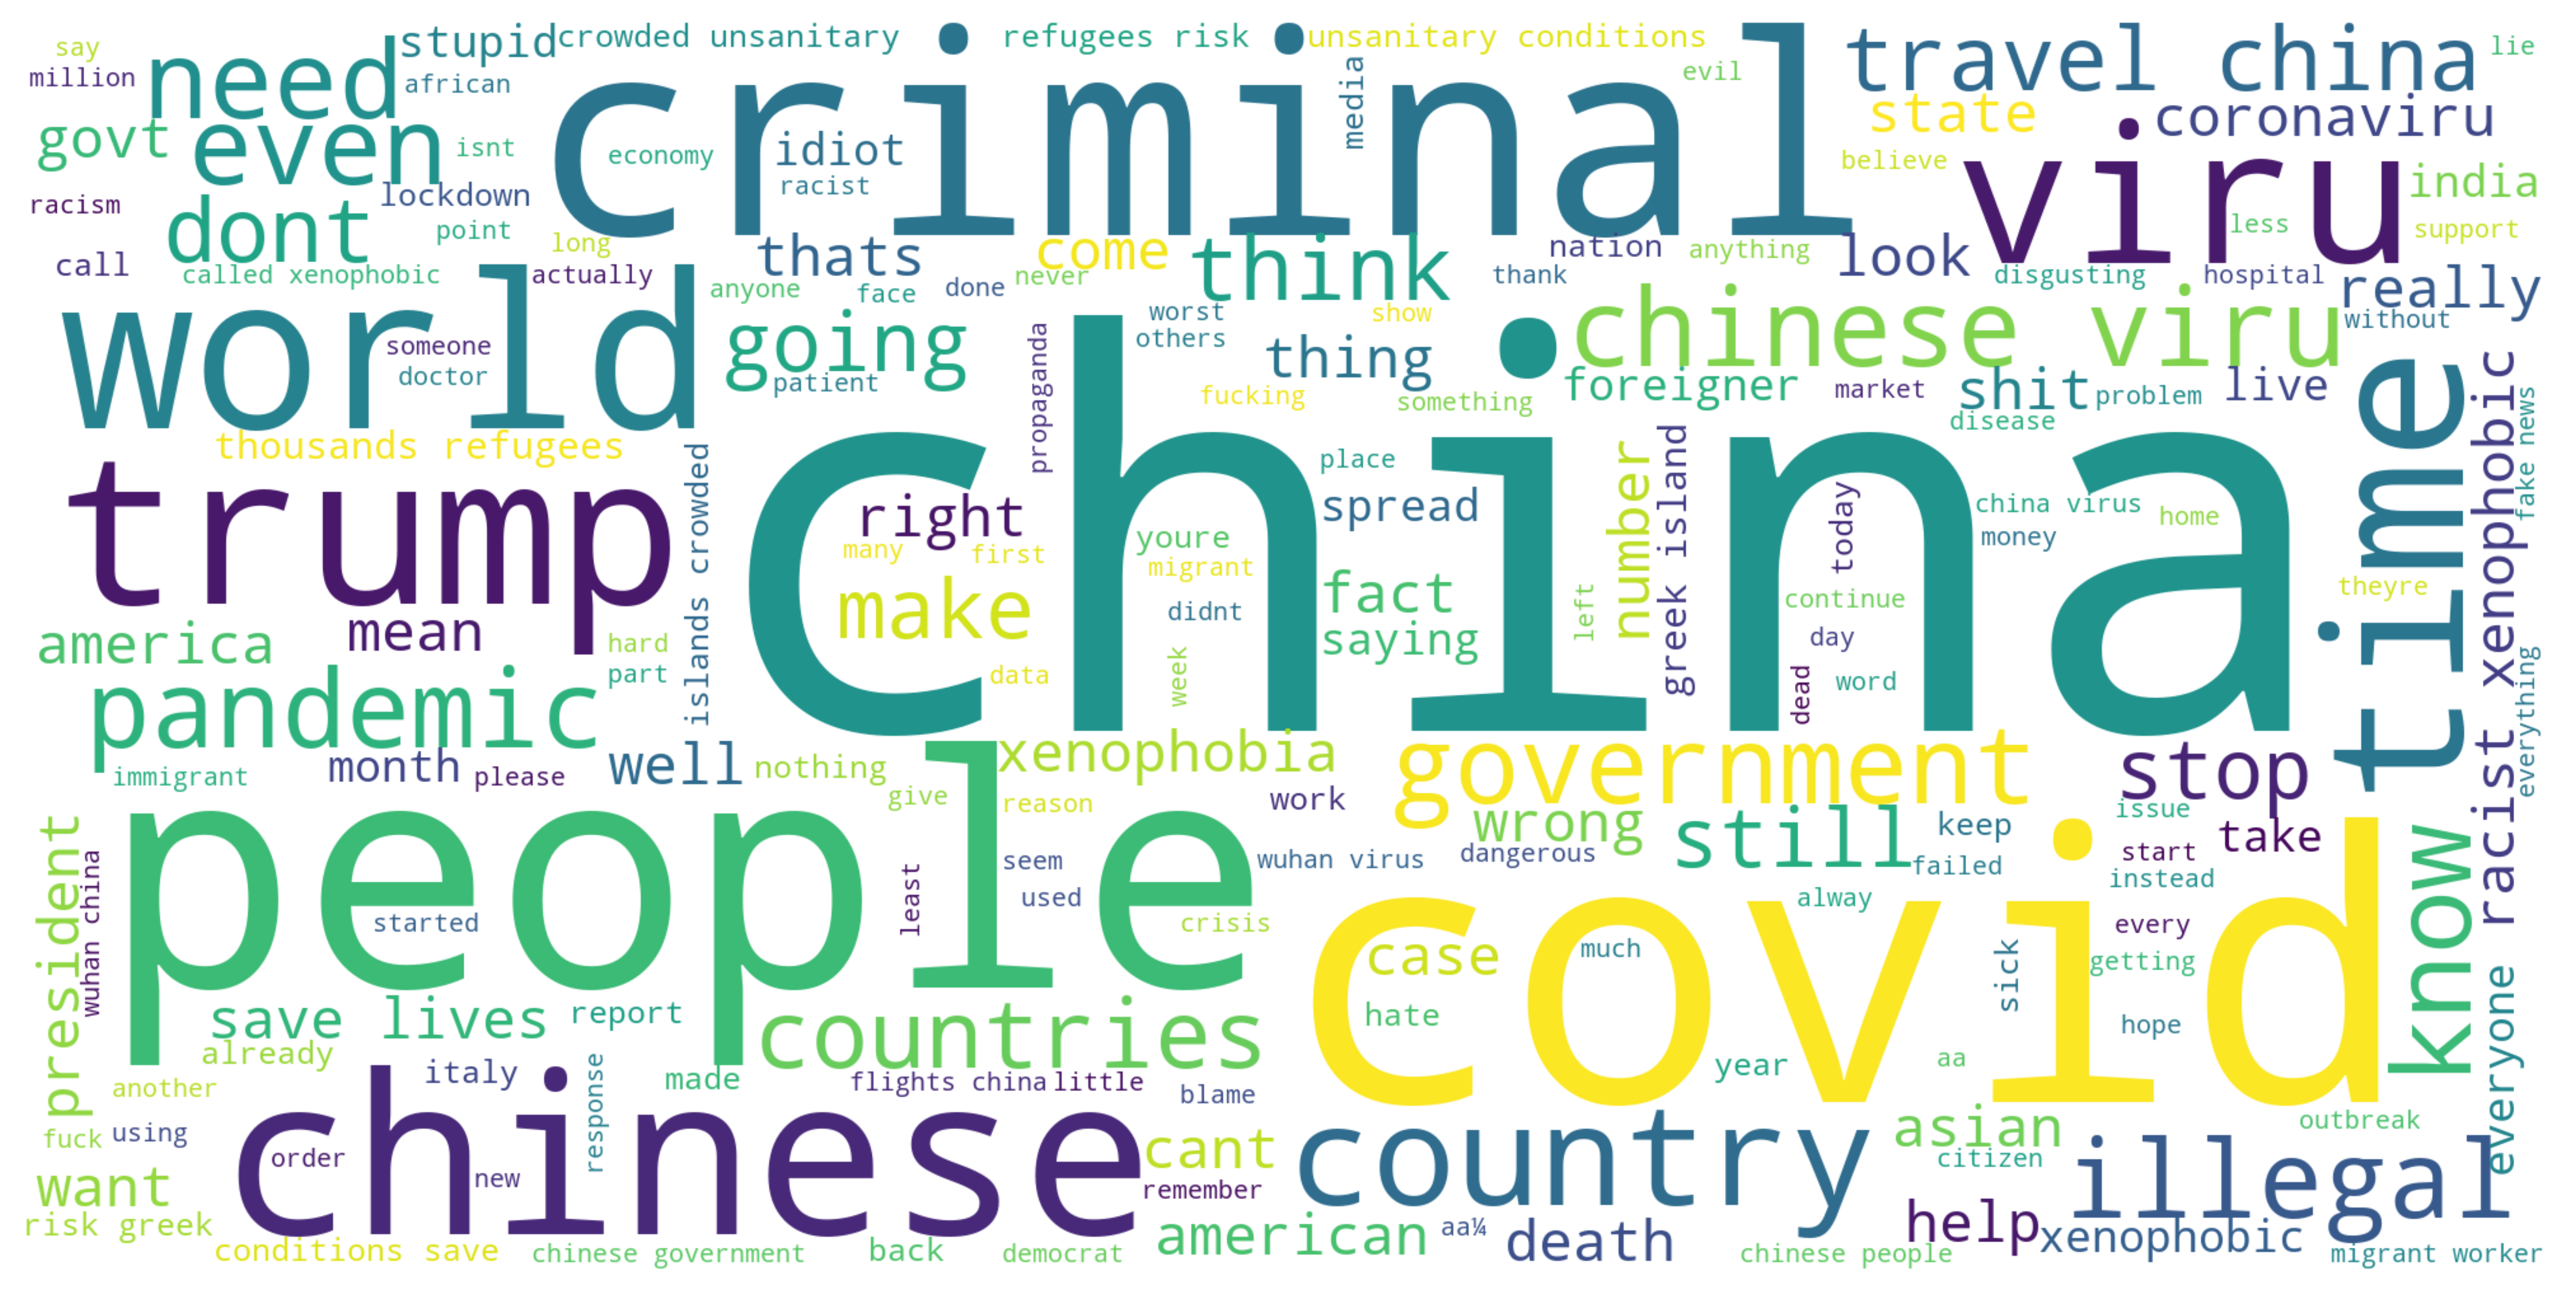

In [ ]:
### WordCloud

# Flatten the list of lists into a single list of strings
#flat_list = [item for sublist in cleaned_data_words for item in sublist]

# Join the processed_data together
long_string = ' '.join(cleaned_data_words)

# create a WordCloud object
wordcloud = WordCloud(background_color='white', max_words=1500, scale=5, contour_width=3, contour_color='steelblue')

#Generate a word cloud
plt.figure(figsize=(20, 20), dpi=300)
wordcloud.generate(long_string)

# Visualize the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Save the wordcloud to a file
wordcloud.to_file('/content/drive/MyDrive/Python/PAI 789/xenophobic_wordcloud.png')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


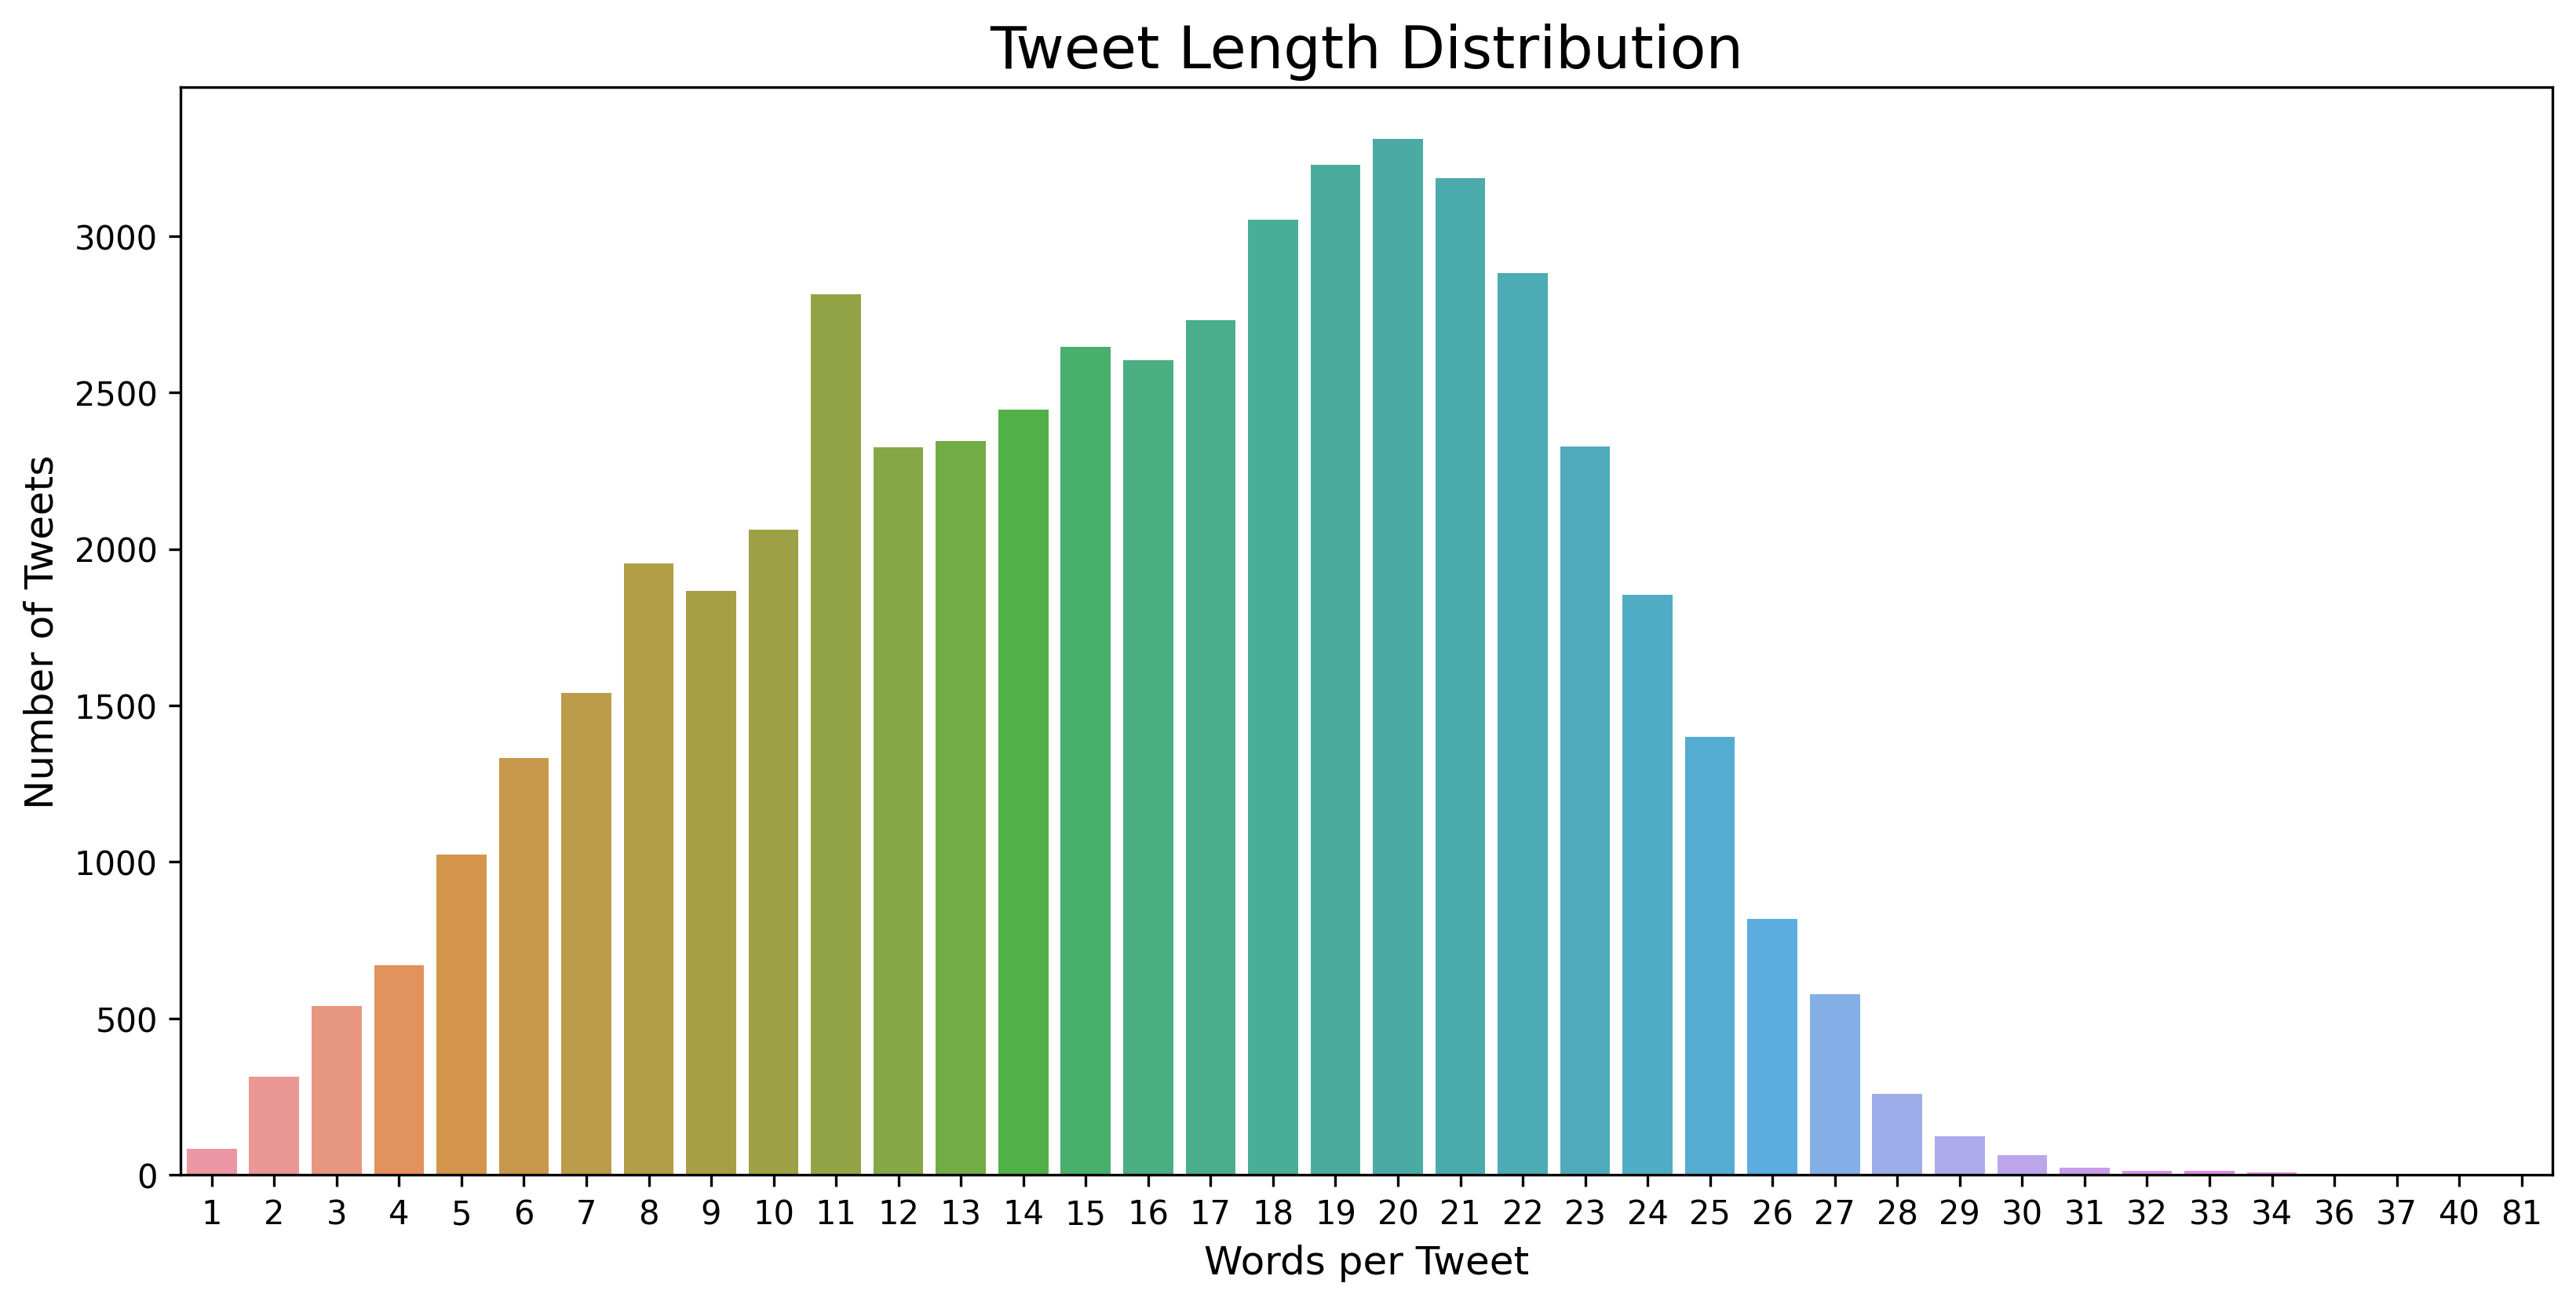

In [ ]:
# Exam the length of each tweet
xeno_lengths = [len(tweet.split()) for tweet in cleaned_data_words]

xenotweet_lengths = pd.DataFrame({'xeno_lengths': xeno_lengths})
plt.figure(figsize=(13,6), dpi=300)
sns.countplot(data=xenotweet_lengths, x='xeno_lengths')
plt.title('Tweet Length Distribution', fontsize=18)
plt.xlabel('Words per Tweet', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.show()

### Topic Modeling -- LDA Model

In [ ]:
# Replace brackets and split into list of individual words for each tweet
cleaned_data_words = [tweet.replace('[', '').replace(']', '').split(', ') for tweet in cleaned_data_words]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Preprocess the data for the LDA Model
# Create dictionary
id2word = corpora.Dictionary(cleaned_data_words)

# Create Corpus
texts = cleaned_data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]


In [ ]:
# number of topics
num_topics=5

# Build LDA modelgensim.models.LdaMulticore
xeno_lda_model=gensim.models.LdaMulticore(corpus=corpus,
                                     id2word=id2word,
                                     num_topics=num_topics)


for idx, topic in xeno_lda_model.print_topics(-1):
  print('Topic:{} \nWords: {}'.format(idx+1, topic))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic:1 
Words: 0.032*"criminal" + 0.021*"china" + 0.014*"a" + 0.012*"lives" + 0.009*"risk" + 0.009*"thousands" + 0.008*"save" + 0.008*"refugees" + 0.007*"chinese" + 0.007*"covid"
Topic:2 
Words: 0.055*"china" + 0.019*"covid" + 0.017*"world" + 0.015*"chinese" + 0.011*"virus" + 0.009*"people" + 0.007*"countries" + 0.005*"like" + 0.005*"dont" + 0.005*"stop"
Topic:3 
Words: 0.028*"xenophobic" + 0.026*"china" + 0.019*"travel" + 0.018*"called" + 0.017*"trump" + 0.017*"racist" + 0.011*"illegal" + 0.009*"criminal" + 0.008*"president" + 0.007*"flights"
Topic:4 
Words: 0.029*"china" + 0.028*"chinese" + 0.026*"virus" + 0.023*"covid" + 0.012*"trump" + 0.010*"people" + 0.009*"wuhan" + 0.006*"cases" + 0.006*"calling" + 0.005*"criminal"
Topic:5 
Words: 0.027*"china" + 0.014*"people" + 0.014*"covid" + 0.008*"chinese" + 0.008*"trump" + 0.007*"death" + 0.006*"dont" + 0.006*"migrant" + 0.005*"xenophobia" + 0.005*"virus"


In [ ]:
from gensim.models import CoherenceModel

# compute coherence score 

coherence_model_lda=CoherenceModel(model=xeno_lda_model, texts=cleaned_data_words, dictionary=id2word, coherence='c_v')
coherence_lda=coherence_model_lda.get_coherence()
print("Coherence Score: ", coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.28376487303601994


#Reference

https://medium.com/towards-data-science/lda-topic-modeling-with-tweets-deff37c0e131